In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
from sklearn.datasets import load_diabetes

In [117]:
data = load_diabetes()

In [118]:
X = data.data
y = data.target

In [119]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Using Linear Regression :

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [122]:
L = LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

In [123]:
y_pred = L.predict(X_test)

In [124]:
print("R2 Score :",r2_score(y_test,y_pred))
print("MSE   : ",mean_squared_error(y_test,y_pred))
print("RMSE  : ",root_mean_squared_error(y_test,y_pred))

R2 Score : 0.5188113124539249
MSE   :  2374.333939618319
RMSE  :  48.72713760953253


## Using Ridge(L2) Regression :

In [125]:
from sklearn.linear_model import Ridge

In [126]:
R = Ridge(alpha=0.01)

In [127]:
R.fit(X_train,y_train)    #Training

Ridge(alpha=0.01)

In [128]:
y_pred = R.predict(X_test)

In [130]:
print("R2 Score :",r2_score(y_test,y_pred))
print("MSE   : ",mean_squared_error(y_test,y_pred))
print("RMSE  : ",root_mean_squared_error(y_test,y_pred))

R2 Score : 0.5230847087541542
MSE   :  2353.2476794137865
RMSE  :  48.510284264409194


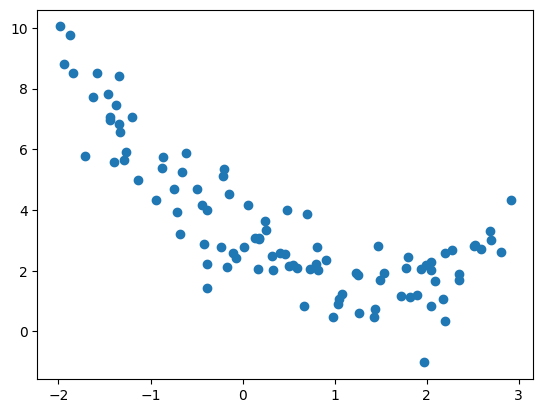

In [132]:
m = 100
x1 = 5*np.random.rand(m,1) - 2
x2 = 0.7*x1**2 - 2*x1 + 3+ np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

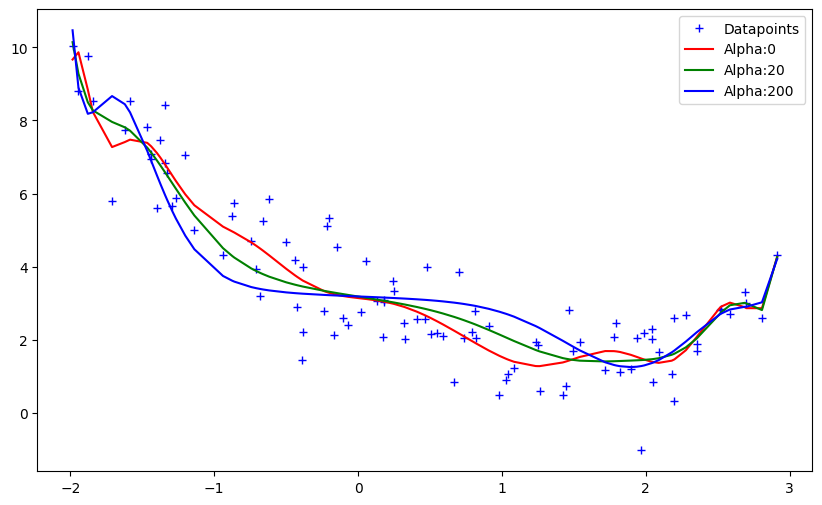

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model=Pipeline([
                    ('poly_feats',PolynomialFeatures(degree=16)),
                    ('ridge',Ridge(alpha=alpha))
                   ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    preds = get_preds_ridge(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha:{}'.format(alpha))

plt.legend()
plt.show() 

In [134]:
## NOTE :-
# Alpha:0 ==> Degree 16 Polynomial ==> Overfitting
# Alpha:20 ==>  Optimal
# Alpha:200 ==> Underfitting